vespa's calcfpp runs FPPCalculation
 - reads starfield.h5 fed into PopulationSet
 
fpp is computed using trsig and popset

## vespa results

From `fpp.ini`, `maxrad` = 3

In [1]:
import pandas as pd

df = pd.read_hdf('../vespa/all_scenarios/starfield.h5')
df

,Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,...,J_mag,H_mag,Ks_mag,Kepler_mag,g_mag,r_mag,i_mag,z_mag,DDO51_finf_mag,Mact
0,1,6.61,-0.35,0.01853,-2.903,3.368,4.025,13.0,1.390,0.0,...,23.265,22.591,22.111,28.797,32.688,30.497,27.781,25.793,31.908,0.019
1,1,6.61,-0.33,0.02256,-2.730,3.393,4.037,13.4,1.386,0.0,...,23.253,22.608,22.155,28.424,31.960,29.887,27.368,25.599,31.271,0.023
2,1,6.61,-0.33,0.08267,-2.008,3.498,4.302,13.6,1.416,0.0,...,21.909,21.203,20.866,25.687,28.271,26.179,24.652,23.668,27.913,0.083
3,1,6.61,-0.27,0.27375,-1.934,3.571,5.041,13.4,1.332,0.0,...,21.650,20.942,20.669,24.706,26.654,24.823,23.864,23.188,26.419,0.274
4,1,6.61,-0.25,0.17586,-1.932,3.536,4.707,12.0,0.939,0.0,...,20.063,19.409,19.117,23.210,25.275,23.476,22.347,21.613,24.988,0.176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516167,3,10.11,-0.11,0.65239,-0.878,3.650,4.678,16.6,3.973,0.0,...,23.217,22.135,21.792,27.184,29.511,27.163,26.089,25.149,29.055,0.652
516168,3,10.11,-0.09,0.40383,-1.577,3.584,4.902,16.0,3.582,0.0,...,24.032,23.042,22.654,28.322,30.971,28.462,27.100,26.005,30.518,0.404
516169,3,10.11,-0.05,0.24878,-2.017,3.555,5.015,15.2,3.143,0.0,...,24.147,23.238,22.822,28.428,31.117,28.673,27.206,26.093,30.604,0.249
516170,3,10.11,-0.03,0.61085,-1.035,3.630,4.725,14.3,1.789,0.0,...,20.609,19.738,19.518,23.491,25.206,23.466,22.727,22.151,25.019,0.611


In [2]:
df.columns

Index(['Gc', 'logAge', '[M/H]', 'm_ini', 'logL', 'logTe', 'logg', 'm-M0', 'Av',
       'm2/m1', 'mbol', 'TESS_mag', 'J_mag', 'H_mag', 'Ks_mag', 'Kepler_mag',
       'g_mag', 'r_mag', 'i_mag', 'z_mag', 'DDO51_finf_mag', 'Mact'],
      dtype='object')

array([[<AxesSubplot:title={'center':'TESS_mag'}>]], dtype=object)

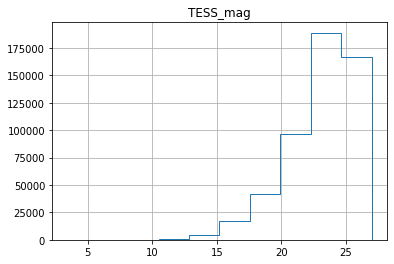

In [3]:
df.hist('TESS_mag', histtype='step')

In [4]:
df.shape

(516172, 22)

From http://svo2.cab.inta-csic.es/theory/fps/, m2 i-band overlaps better with TESS filter profile.

https://exofop.ipac.caltech.edu/tess/target.php?id=470381900

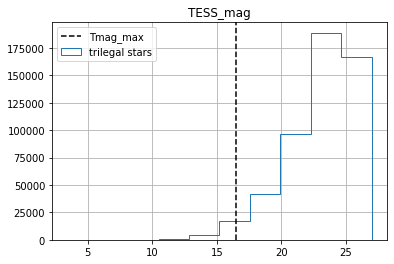

In [5]:
import numpy as np
import matplotlib.pyplot as pl

Tmag = 13.9664 #± 0.00730068
depth_in_m2r = 0.1007
depth_in_m2i = 0.0985
depth_in_m2z = 0.0984
dT = -2.5 * np.log10(depth_in_m2i)
Tmag_max = Tmag + dT
Tmag_max

df.hist('TESS_mag', histtype='step', label='trilegal stars')
pl.axvline(Tmag_max, 0, 1, c='k', ls='--', label='Tmag_max')
pl.legend(loc='upper left')

In [6]:
stars_brighter_than_Tmag_max = df[df['TESS_mag']<Tmag_max]
stars_brighter_than_Tmag_max

,Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,...,J_mag,H_mag,Ks_mag,Kepler_mag,g_mag,r_mag,i_mag,z_mag,DDO51_finf_mag,Mact
7,1,6.61,-0.23,7.84277,3.408,4.351,4.274,12.5,0.996,0.0,...,11.783,11.794,11.798,11.970,11.920,12.040,12.191,12.314,11.954,7.843
31,1,6.61,-0.05,2.59227,1.673,4.051,4.328,13.7,1.492,0.0,...,15.344,15.236,15.155,16.169,16.405,16.216,16.193,16.113,16.315,2.592
38,1,6.61,-0.03,1.80063,1.056,3.931,4.308,13.0,1.127,0.0,...,15.259,15.131,15.045,16.173,16.434,16.183,16.136,16.076,16.299,1.801
79,1,6.61,0.09,1.14880,0.119,3.776,4.432,11.1,0.476,0.0,...,14.652,14.323,14.258,15.914,16.433,15.853,15.680,15.593,16.207,1.149
80,1,6.61,0.09,1.27731,0.359,3.805,4.351,11.5,0.587,0.0,...,14.622,14.341,14.276,15.810,16.265,15.759,15.608,15.532,16.059,1.277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514651,3,10.11,-1.69,0.80136,0.463,3.813,4.077,12.6,1.000,0.0,...,15.703,15.355,15.267,17.126,17.651,17.101,16.868,16.698,17.432,0.801
515322,3,10.11,-1.39,0.83549,2.894,3.645,0.993,15.2,2.821,0.0,...,12.038,11.065,10.793,15.393,17.294,15.383,14.498,13.757,16.596,0.835
515338,3,10.11,-1.35,0.82760,0.711,3.743,3.563,12.8,1.189,0.0,...,14.996,14.483,14.360,16.845,17.659,16.810,16.436,16.152,17.336,0.828
515813,3,10.11,-1.03,0.60525,-0.773,3.694,4.715,7.3,0.067,0.0,...,12.664,12.171,12.086,14.128,14.783,14.071,13.827,13.699,14.576,0.605


In [7]:
Nstars = stars_brighter_than_Tmag_max.shape[0]

#percent of stars bright enough to reproduce TESS signal
N = Nstars/df.shape[0]
N

0.023658780406531157

In [8]:
import numpy as np
import astropy.units as u

muscat_phot_rad = 3*u.arcsec
area = np.pi*muscat_phot_rad**2
area = area.to(u.deg**2)
area

<Quantity 2.18166156e-06 deg2>

In [10]:
area * N / u.deg**2

<Quantity 5.16154519e-08>

So BEB prob is actually 50 in a billion.